<a href="https://colab.research.google.com/github/jcavalca/breast-cancer-research/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Necessary Packages and Functions

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


### Reading Subtype Dataset

In [6]:
df_subtype = pd.read_csv("BRCA.547.PAM50.SigClust.Subtypes.txt", sep="\t")

In [7]:
df_subtype = df_subtype.set_index("Sample")
df_subtype.rename(columns = {'PAM50':'Subtype'}, inplace = True)

In [8]:
df_subtype.head()

,Type,Siglust,Subtype
Sample,,,
TCGA-AN-A0FL-01A-11R-A034-07,tumor,-13,Basal
TCGA-A1-A0SK-01A-12R-A084-07,tumor,-13,Basal
TCGA-BH-A0HL-01A-11R-A034-07,tumor,-13,Basal
TCGA-BH-A0HN-01A-11R-A084-07,tumor,-13,Basal
TCGA-BH-A0E0-01A-11R-A056-07,tumor,-13,Basal


\### Reading Gene Expression Dataset

In [9]:
df_expression = pd.read_csv("BRCA.exp.547.med.txt", sep="\t").transpose()

In [10]:
genes = df_expression.loc["NAME"]
df_expression = df_expression.drop("NAME")
df_expression.columns = genes

In [11]:
df_expression.head()

NAME,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,...,SLC2A11,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC
TCGA-A1-A0SD-01A-11R-A115-07,0.220167,0.54375,0.354875,0.4335,1.065167,-0.11225,0.262333,-0.16625,0.322375,-0.496,...,0.308833,-0.00275,0.048,-0.2987,0.0625,-0.1575,0.1907,0.0472,-0.1925,-0.7193
TCGA-A1-A0SE-01A-11R-A084-07,-0.1055,0.0,0.305875,0.03925,0.517,1.31575,0.175333,-0.2975,0.067,0.0085,...,0.214333,0.05975,0.275167,0.2673,-0.0675,0.686,1.5998,-0.0969,-0.546,-0.8805
TCGA-A1-A0SH-01A-11R-A084-07,0.174583,1.3685,0.007,0.2325,1.844667,0.17925,0.6395,-0.05175,-0.47675,-0.138,...,0.027167,-0.02175,-0.2815,0.5805,0.278,0.24475,0.0275,-0.2257,-0.613,-0.491
TCGA-A1-A0SJ-01A-11R-A084-07,0.590083,-0.453,-0.295125,0.66525,-0.530167,0.12225,0.47,-0.02375,-0.421375,0.2545,...,0.483833,0.2475,0.615667,-0.0739,-0.448,0.7325,2.6229,0.3027,2.0545,-0.4711
TCGA-A1-A0SK-01A-12R-A084-07,1.125417,-1.528,0.08275,0.85075,-1.674,-0.849,-1.1125,0.732,0.23375,-0.494,...,-0.640833,0.13075,0.081,0.627,-0.239,-0.26475,-0.9026,-0.0246,-0.564,-0.359


### Merging into a Single Dataset

In [12]:
# dropping genes instead of individuals due to small sample size (dropping individuals almost cut sample in half)
df_combined = df_subtype.merge(df_expression, how="outer", left_index=True, right_index=True).dropna(axis=1)
df_combined.head()

,Type,Siglust,Subtype,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,...,CSF2,SLC2A11,GRIP2,GPLD1,RAB8A,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC
TCGA-A1-A0SD-01A-11R-A115-07,tumor,-9,LumA,0.220167,0.54375,0.354875,0.4335,1.065167,-0.11225,0.262333,...,-0.43375,0.308833,-0.00275,0.048,-0.2987,-0.1575,0.1907,0.0472,-0.1925,-0.7193
TCGA-A1-A0SE-01A-11R-A084-07,tumor,-5,LumA,-0.1055,0.0,0.305875,0.03925,0.517,1.31575,0.175333,...,-0.1675,0.214333,0.05975,0.275167,0.2673,0.686,1.5998,-0.0969,-0.546,-0.8805
TCGA-A1-A0SH-01A-11R-A084-07,tumor,-5,LumA,0.174583,1.3685,0.007,0.2325,1.844667,0.17925,0.6395,...,-0.258,0.027167,-0.02175,-0.2815,0.5805,0.24475,0.0275,-0.2257,-0.613,-0.491
TCGA-A1-A0SJ-01A-11R-A084-07,tumor,-3,LumA,0.590083,-0.453,-0.295125,0.66525,-0.530167,0.12225,0.47,...,-0.415,0.483833,0.2475,0.615667,-0.0739,0.7325,2.6229,0.3027,2.0545,-0.4711
TCGA-A1-A0SK-01A-12R-A084-07,tumor,-13,Basal,1.125417,-1.528,0.08275,0.85075,-1.674,-0.849,-1.1125,...,-1.12875,-0.640833,0.13075,0.081,0.627,-0.26475,-0.9026,-0.0246,-0.564,-0.359


### Creating Random Forest Model

In [13]:
X = df_combined.drop(["Type", "Siglust", "Subtype"], axis=1) 
y = df_combined[["Subtype"]]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5) # 70% training and 30% test

In [15]:
model = RandomForestClassifier()
model.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

### Evaluating Random Forest Model

In [16]:
y_pred = model.predict(X_test)

In [17]:
df_comparison = pd.DataFrame(zip(list(y_test['Subtype']), list(y_pred)), columns=['Actual','Predicted'])
df_comparison.head()

,Actual,Predicted
0,LumA,LumA
1,Basal,Basal
2,LumA,LumA
3,LumA,LumA
4,LumA,LumA


In [18]:
confusion_matrix = pd.crosstab(df_comparison['Actual'], df_comparison['Predicted'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,Basal,Her2,LumA,LumB,Normal
Actual,,,,,
Basal,23,0,0,0,0
Her2,0,9,1,7,0
LumA,0,0,74,4,0
LumB,0,1,11,25,0
Normal,0,0,0,1,9


In [19]:
precision_scores = precision_score(list(y_test['Subtype']), list(y_pred), average=None)
precision_scores = [round(i, 2) for i in precision_scores]
recall_scores = recall_score(list(y_test['Subtype']), list(y_pred), average=None)
recall_scores = [round(i, 2) for i in recall_scores]

In [20]:
df_scores = pd.DataFrame(zip(precision_scores, recall_scores, confusion_matrix.columns), columns=['Precision','Recall', 'Class'])
df_scores = df_scores.set_index('Class')
df_scores

,Precision,Recall
Class,,
Basal,1.00,1.00
Her2,0.90,0.53
LumA,0.86,0.95
LumB,0.68,0.68
Normal,1.00,0.90


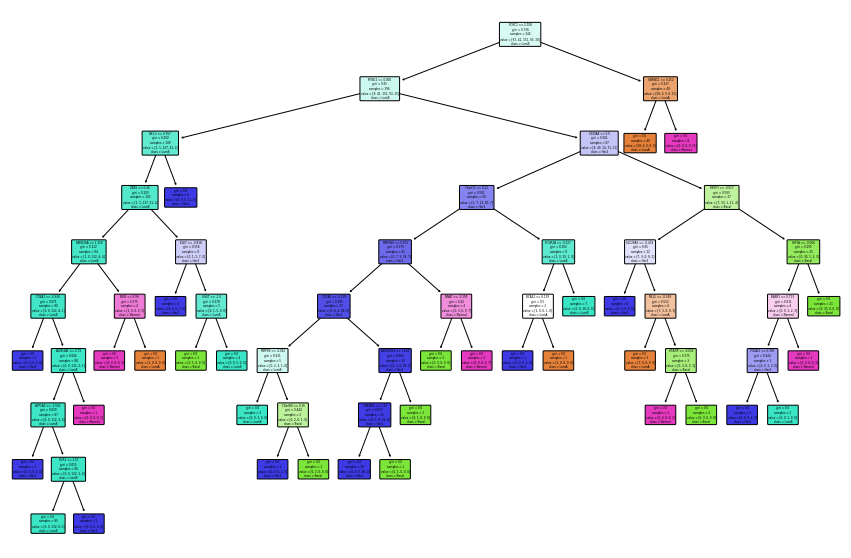

In [21]:
fig = plt.figure(figsize=(15, 10))
plot_tree(model.estimators_[0], 
          feature_names=X.columns,
          class_names=df_combined['Subtype'].unique(), 
          filled=True, rounded=True)

plt.show()

### Genes Importance given by Random Regressor Classifier

In [22]:
model.feature_importances_

array([0.00000000e+00, 4.82259296e-05, 0.00000000e+00, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [23]:
X.columns

Index(['ELMO2', 'CREB3L1', 'RPS11', 'PNMA1', 'MMP2', 'C10orf90', 'ZHX3',
       'ERCC5', 'GPR98', 'RXFP3',
       ...
       'CSF2', 'SLC2A11', 'GRIP2', 'GPLD1', 'RAB8A', 'PIK3IP1', 'SLC39A6',
       'SNRPD2', 'AQP7', 'CTSC'],
      dtype='object', length=17316)

In [24]:
# sorted descending by importance
df_importance = pd.DataFrame(zip(X.columns, list(model.feature_importances_)), columns=["Gene", "Importance"]).set_index("Gene").sort_values(by="Importance", ascending = False)
df_importance.head(20)

,Importance
Gene,
GATA3,0.010613
ANXA9,0.007726
CDC45L,0.005842
AGR3,0.005627
CEP55,0.005603
MLPH,0.005466
FOXL1,0.005083
PLK1,0.004733
TFF3,0.004669


In [25]:
df_subtype["Subtype"].value_counts()

LumA      232
LumB      129
Basal      98
Her2       58
Normal     30
Name: Subtype, dtype: int64

### Evaluating Model W/ Other Dataset

In [92]:
import scipy.io

mat = scipy.io.loadmat("BRCA1View20000.mat")
gene_labels = [g[0] for g in mat['gene'][0]]
df_20000 = pd.DataFrame(mat['data'].transpose(), columns=gene_labels)
# df['id'] = mat['id'][0]
df_20000['target'] = mat['targets']
df_20000['Subtype'] = df_20000.target.map({1:'Basal',2:'HER2+',3:'LumA',4:'LumB',5:'Normal Like',6:'Normal'})
df_20000 = df_20000[df_20000["Subtype"] != "Normal Like"]
df_20000.head()

LumA      721
LumB      491
Basal     330
HER2+     239
Normal    150
Name: Subtype, dtype: int64

In [95]:
def subtypeMapping(subtype):
  if subtype == "HER2+":
    return "Her2"
  return subtype

In [97]:
df_20000["Subtype"] = df_20000["Subtype"].map(subtypeMapping)

In [98]:
genes_in_common = set(list(df_combined.columns)).intersection(set(list(df_20000.columns)))
df_combined_drop_columns = set(df_combined.columns[3:]) - genes_in_common
df_20000_drop_columns = set(df_20000.columns[:-2]) - genes_in_common
len(genes_in_common)

14833

In [99]:
df_combined_common_genes = df_combined.drop(df_combined_drop_columns, axis=1)
df_20000_common_genes = df_20000.drop(df_20000_drop_columns, axis=1)

In [100]:
df_combined_common_genes.head(2)

,Type,Siglust,Subtype,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,...,HCLS1,CSF2,SLC2A11,GPLD1,RAB8A,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC
TCGA-A1-A0SD-01A-11R-A115-07,tumor,-9,LumA,0.220167,0.54375,0.354875,0.4335,1.065167,-0.11225,0.262333,...,-0.554667,-0.43375,0.308833,0.048,-0.2987,-0.1575,0.1907,0.0472,-0.1925,-0.7193
TCGA-A1-A0SE-01A-11R-A084-07,tumor,-5,LumA,-0.1055,0.0,0.305875,0.03925,0.517,1.31575,0.175333,...,-0.412333,-0.1675,0.214333,0.275167,0.2673,0.686,1.5998,-0.0969,-0.546,-0.8805


In [101]:
df_20000_common_genes.head()

,SCGB2A2,MUCL1,SCGB1D2,PIP,DNAJA2,TFF3,S100P,CPB1,CEACAM6,SCGB2A1,...,FBXO25,MLANA,DAB1,C2orf19,NSL1,SYT5,C10orf62,IL1RAP,target,Subtype
0,6.365374,5.610561,5.134799,5.735802,5.443985,8.005882,5.615179,6.682096,5.756946,5.444719,...,5.475921,5.058263,5.178206,5.105706,6.284404,5.616339,5.245275,5.396492,6,Normal
1,14.330442,7.979139,10.244240,7.138279,11.195867,13.511164,10.548596,5.491578,6.805606,10.942782,...,5.554798,5.220061,4.974619,5.486211,6.358165,5.453547,5.450314,5.273045,4,LumB
2,14.388331,6.016715,12.164435,5.272691,5.265518,13.386034,8.764722,7.331663,11.967719,12.690971,...,5.849457,5.245774,5.241753,5.759466,6.129600,5.861127,5.319894,5.549589,4,LumB
4,12.243103,7.293489,10.919581,9.566137,11.492583,11.531352,9.818938,9.443134,6.889670,8.416175,...,5.243130,5.296567,5.230233,5.283717,6.357914,5.458864,5.100869,5.479967,3,LumA
5,12.805814,5.988130,10.158678,8.014498,5.153460,14.464282,6.916060,7.431630,8.414641,8.753603,...,5.729262,5.433647,5.391205,5.341332,6.414287,5.505140,5.309892,5.486193,2,Her2


In [102]:
X_train = df_combined_common_genes.drop(["Type", "Siglust", "Subtype"], axis=1)
y_train = df_combined_common_genes["Subtype"]

In [72]:
model = RandomForestClassifier()
model.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [129]:
X_test = df_20000_common_genes.drop(["target", "Subtype"], axis=1)
y_test = df_20000_common_genes["Subtype"]

In [130]:
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [144]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

       Basal       0.00      0.00      0.00       330
        Her2       0.12      1.00      0.22       239
        LumA       0.00      0.00      0.00       721
        LumB       0.00      0.00      0.00       491
      Normal       0.00      0.00      0.00       150

    accuracy                           0.12      1931
   macro avg       0.02      0.20      0.04      1931
weighted avg       0.02      0.12      0.03      1931



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
